**8. Simple Linear Regression Analysis on Auto Data Set**

**(a)** Utilize the `sm.OLS()` function to conduct a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Apply the `summarize()` function to display the results. Reflect on the findings, considering questions such as:

- Is there a discernible relationship between the predictor and the response?
- How robust is the connection between the predictor and the response?
- Does the relationship between the predictor and the response exhibit a positive or negative trend?
- What is the estimated `mpg` for a `horsepower` of 98? Include the 95% confidence and prediction intervals.

**(b)** Plot the response and the predictor in a new set of axes ax. Use the ax.axline() method or the abline() function defined in the lab to display the least squares regression line.

**(c)** Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

---

In [5]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
from matplotlib.pyplot import subplots


In [7]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)


In [10]:
auto = load_data("Auto")
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [20]:
# Criação de um DataFrame 'X' com uma coluna 'Intercept' com '1' (VER EXPLICAÇÂO NO LAB),
# e uma coluna 'horsepower' com os valores do DataFrame 'auto', preparando os dados para regressão linear.
X = pd.DataFrame({'Intercept': np.ones(auto.shape[0]),
                       'horsepower': auto['horsepower']})

In [21]:
# Definição da variável dependente 'y' como a coluna 'horsepower' do DataFrame 'auto'.
# Criação do modelo de regressão linear OLS (Ordinary Least Squares) com 'y' como resposta e 'X' como preditor.
# Ajuste do modelo e armazenamento dos resultados na variável 'results'.
y = auto['mpg']
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

/home/pedrohdemedeiros/miniconda3/lib/python3.9/site-packages/ISLP/models/__init__.py:49: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(tab.as_html(),


,coef,std err,t,P>|t|
Intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


**- Is there a discernible relationship between the predictor and the response?**
  
Sim, há. O p valor baixo indica relevância estatística de t.  O coeficiente negativo da variável preditora (horsepower) tem uma relação negativa com a variável resposta (mpg). Ou seja, a medida que horsepower aumenta yma unidade, mpg diminui 0.1578 unidades.
  
*o fat de T ter um valor negativo apenas acompanha a direção do coeficiente

**- How robust is the connection between the predictor and the response?**

Dado que o P-valor é 0 e o T um valor absoluto grande a conexão é bem forte


**- Does the relationship between the predictor and the response exhibit a positive or negative trend?**

Negativo

**- What is the estimated `mpg` for a `horsepower` of 98? Include the 95% confidence and prediction intervals.**

In [24]:
# 1. Calculate the estimated mpg for horsepower of 98
horsepower_value = 98
mpg_estimated = results.params['Intercept'] + results.params['horsepower'] * horsepower_value

# 2. Get prediction intervals
predictions = results.get_prediction([1, horsepower_value])
prediction_intervals = predictions.conf_int()

print(mpg_estimated)

print(prediction_intervals)


24.46707715251243
[[23.97307896 24.96107534]]


**(b)** Plot the response and the predictor in a new set of axes ax. Use the ax.axline() method or the abline() function defined in the lab to display the least squares regression line.

/tmp/ipykernel_4292/474018838.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
/tmp/ipykernel_4292/474018838.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


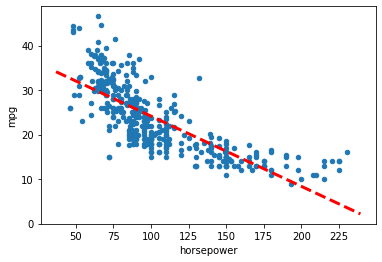

In [28]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)
    
ax = auto.plot.scatter('horsepower', 'mpg')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)


**(c)** Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

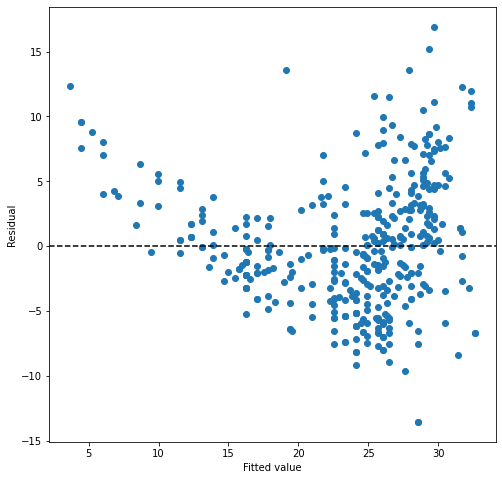

In [29]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

Explicação dos elementos via ChatGPT:

1. **Valores Ajustados no Eixo X**: Os valores no eixo X são os valores previstos pelo modelo de regressão. Eles representam o que o modelo prevê que o `mpg` deve ser para cada observação dada a quantidade de `horsepower`.

2. **Resíduos no Eixo Y**: Os valores no eixo Y são os resíduos. Se um ponto está acima do eixo horizontal (linha y=0), isso significa que o modelo subestimou o `mpg` real para aquela observação. Se um ponto está abaixo, o modelo superestimou o `mpg`.

3. **Linha Horizontal**: A linha horizontal no y=0 ajuda a identificar a tendência nos resíduos. Idealmente, os pontos devem ser distribuídos aleatoriamente ao redor da linha y=0 sem formar nenhum padrão distinto.

4. **Análise**: 
   - Se os resíduos parecem ser distribuídos aleatoriamente sem padrão claro, isso sugere que o modelo é apropriado para os dados.
   - Se há um padrão, como uma forma em 'U' ou 'funil', isso pode indicar problemas como não-linearidade, heterocedasticidade (variação dos resíduos não é constante) ou influência de pontos extremos (outliers).

----

O gráfico apresenta um valor de U, revelando a inadequação do modelo à distribuição dos dados. A linearidade implicaria em uma distribuição aleatória acima e abaixo da linha orizontal

115

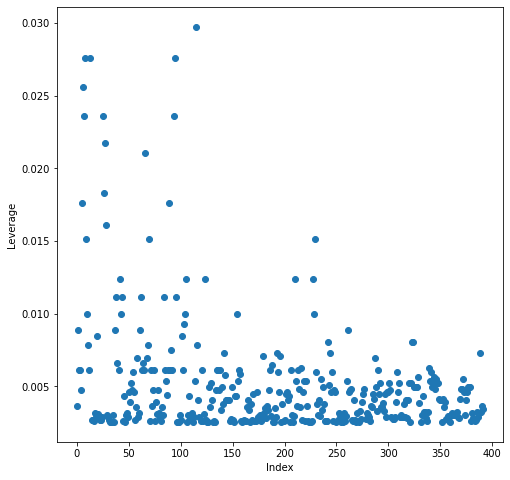

In [30]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

Explicação do ChatGPT:

O gráfico de alavancagem (leverage) contra o índice das observações é uma ferramenta para identificar pontos de dados que têm uma influência desproporcional sobre a estimativa dos parâmetros do modelo. A alavancagem é uma medida de quão longe um ponto de dado está dos outros pontos na variável independente.

Aqui está como analisar o gráfico:

- **Eixo X (Index)**: Representa o índice ou a ordem dos pontos de dados no conjunto de dados.
- **Eixo Y (Leverage)**: Mostra o valor de alavancagem de cada ponto de dado. Pontos com alta alavancagem podem ter um grande impacto no ajuste do modelo.

Para analisar:

- **Pontos de Alta Alavancagem**: Pontos com valores de alavancagem significativamente maiores do que os outros podem ser outliers em termos de X e têm o potencial de distorcer significativamente a linha de regressão.
- **Limiar de Alavancagem**: Um limiar comum é `2*(k+1)/n`, onde `k` é o número de preditores e `n` é o número de observações. Pontos acima desse limiar são considerados como tendo alta alavancagem.
- **Ação**: Se encontrar pontos com alta alavancagem, é importante examiná-los cuidadosamente e decidir se eles são dados válidos ou se são erros de entrada de dados ou outliers que devem ser removidos ou tratados de forma diferente.

O último comando `np.argmax(infl.hat_matrix_diag)` identifica o índice do ponto de dado com a maior alavancagem no conjunto de dados. Este ponto específico é um bom candidato para investigação adicional, pois pode ser um outlier ou um ponto influente.

---------

Verifica-se que os primeiros pontos tem alta alavancagem e podem estar influenciando a adequação do modelo